In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import imshow, color_hist

Histograms are the intensity distribution in the image. For each value they count the number of pixels having that value (so we only focus on one color/grayscale).

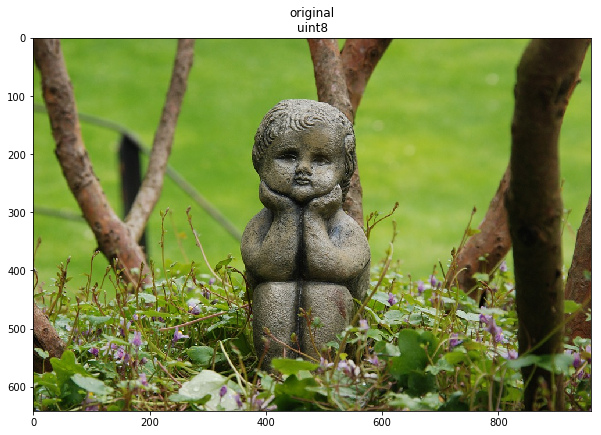

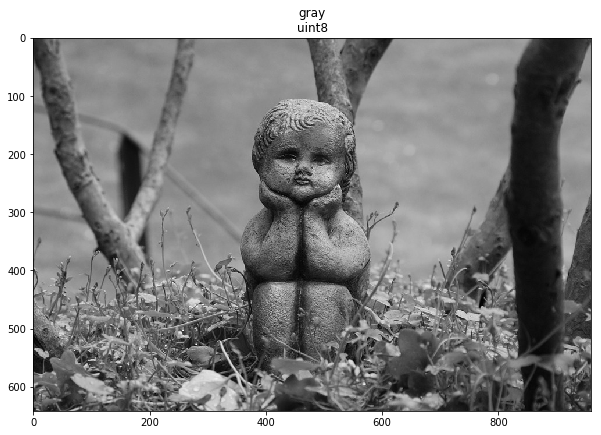

In [2]:
img = cv2.imread("buddha.jpg")
imshow('original', img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow('gray', gray, gray=True)

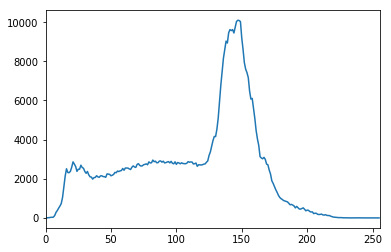

In [3]:
# with opencv
hist =cv2.calcHist([gray], [0], None, [256], [0,256])
plt.plot(hist); plt.xlim([0,256]); plt.show()

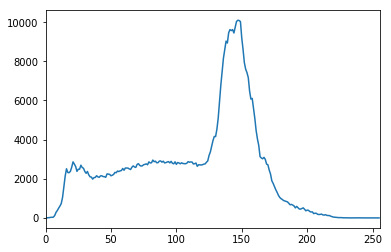

In [4]:
# with numpy (slower)
hist,bins = np.histogram(gray.ravel(), 256, [0,256])
plt.plot(hist); plt.xlim([0,256]); plt.show()

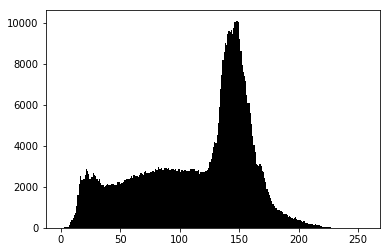

In [5]:
# with pyplot builtin-function (not good for color imgs)
plt.hist(gray.ravel(), 256, [0,256], color='black'); plt.show()

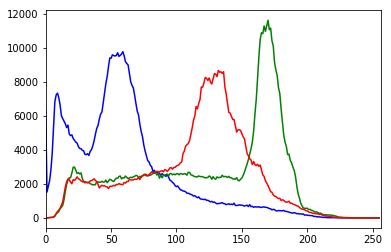

In [8]:
color_hist(img)

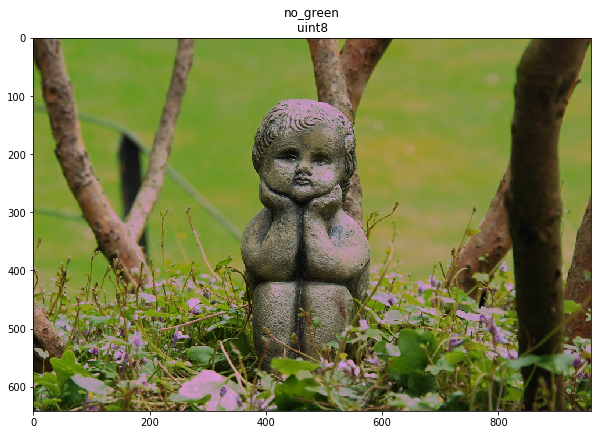

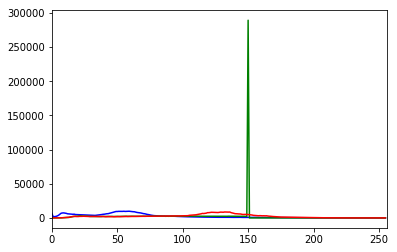

In [37]:
# practicing masking
mask = np.zeros(img.shape[:2], np.uint8)
new_img = img.copy()
clip = 150
new_img[img[:,:,1] > clip, 1] = clip
imshow('no_green', new_img)
color_hist(new_img)

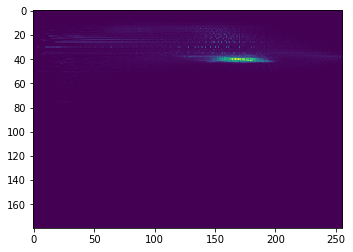

In [38]:
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

plt.imshow(hist, interpolation = 'nearest')
plt.show()

In [79]:
# hsv color attempt
h, s = (180,256)
hue = np.linspace(0,h-1,h)
sat = np.linspace(0,s-1,s)
hue, sat = np.meshgrid(sat,hue)
val = np.uint8((hist*255.)/hist.max())
hue = np.uint8(hue)
sat = np.uint8(sat)
val.max()
# color_hist = cv2.merge((hue, sat, val))

255

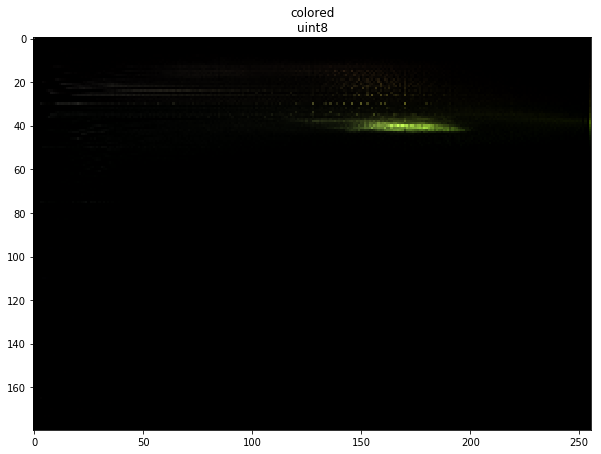

In [90]:
w = np.full_like(val, 255)
stacked = np.stack([sat,hue,val], axis=-1)
colored = cv2.cvtColor(stacked, cv2.COLOR_HSV2BGR)
imshow('colored', colored)
